In [1]:
import pandas as pd
import pickle
import datetime as DT
from operator import mul
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Convert time to minutes

From: https://stackoverflow.com/questions/48447123/convert-time-hhmmss-to-minutes-in-python/48447482 

In [15]:
#Function to convert time to minutes
def convert_to_minutes(my_time):
  factors = (60, 1, 1/60)

  t1 = sum(i*j for i, j in zip(map(int, my_time.split(':')), factors))
  return t1

# Analysis Function

Reads in a specific year of results, returns a pandas dataframe of finisher data (including minutes elapsed)

In [28]:
def analyze_year(year):
  #Read in files
  fp = "/content/gdrive/Shared drives/ELIFE/People/Malloy, John/Random/Black Canyon/BC" + str(year) + "_100k.p"
  df = pickle.load(open(fp, "rb"))

  #Drop the "Did not finish" line
  df = df.drop(df.loc[df["State"] == "Did"].index[0])

  #Create a minutes field to sum up every time - contingent upon convert_to_minutes() function
  df["Minutes"] = df["Time"].apply(convert_to_minutes)
  
  return df[df["Minutes"] > 0]

#Plotting

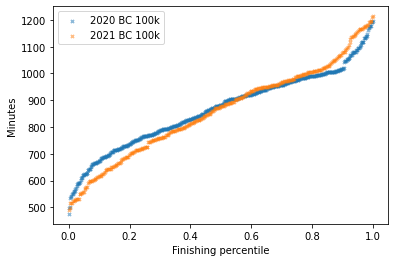

In [51]:
fig = plt.figure()
for year in [2020, 2021]:
  df = analyze_year(year)
  
  plt.scatter(x=np.linspace(0,1,len(df)), y=df["Minutes"], label=str(year) + " BC 100k", alpha=0.5, s=10, marker='x')
  plt.xlabel("Finishing percentile")
  plt.ylabel("Minutes")
# plt.gca().spines("top").set_visible(False)
# plt.gca().spines("right").set_visible(False)
plt.legend()
plt.show()